**Actividad autónoma U3-T2 (AA6)**  
 
**Brayan Cardenas**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('heart_disease_uci.csv')

# Vista general de los datos
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


***Selección y Justificación del Dataset***    

El dataset "Heart Disease UCI" contiene información clínica y demográfica de pacientes, y está orientado a determinar si una persona tiene enfermedad cardíaca. Es un conjunto de datos reales y ampliamente utilizado en problemas de clasificación médica.

**¿Por qué es relevante?**  
Las enfermedades cardíacas son una de las principales causas de muerte a nivel mundial. Poder predecir de forma temprana la presencia de esta condición puede ayudar a tomar decisiones médicas preventivas y salvar vidas.

**Preguntas de investigación:**  
1. ¿Es posible predecir si un paciente tiene enfermedad cardíaca en base a sus signos clínicos?  
2. ¿Qué características (como el colesterol, presión, etc.) influyen más en el diagnóstico?  

**Preprocesamiento y Análisis Exploratorio**

***Inspección inicial del dataset***

In [3]:
# Dimensiones del dataset
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Información general de tipos de datos
df.info()

# Estadísticas básicas
df.describe(include="all")


Filas: 920, Columnas: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


***Limpieza de datos***

In [4]:
# Revisar valores nulos
df.isnull().sum()

# Visualizar columnas irrelevantes
df.columns




Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [5]:
# Eliminar columnas innecesarias (ignorar si no existen)
df.drop(columns=["id", "dataset"], inplace=True, errors='ignore')

***Codificación de variables categóricas***

In [6]:
cat_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()
cat_cols


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [7]:
# Convertir variables categóricas usando one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


***Normalización / Estandarización de variables numéricas***

In [22]:
from sklearn.preprocessing import StandardScaler

# Separar variables predictoras y objetivo
X = df_encoded.drop("num", axis=1)
y = df_encoded["num"].apply(lambda x: 1 if x > 0 else 0)  # Clasificación binaria

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


***Visualización exploratoria de los datos***

a) Distribución de clases

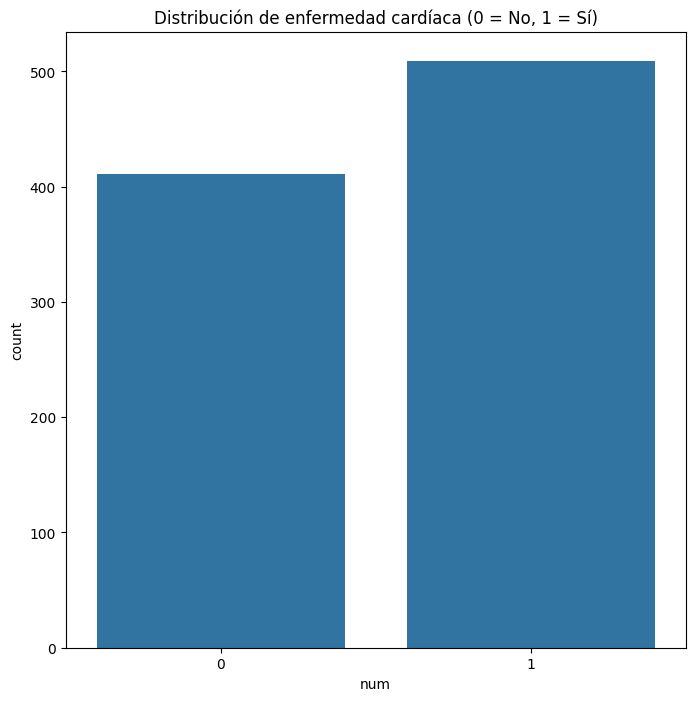

In [9]:
plt.figure(figsize=(8, 8))
sns.countplot(x=y)
plt.title("Distribución de enfermedad cardíaca (0 = No, 1 = Sí)")
plt.show()

***Mapa de calor de correlaciones***

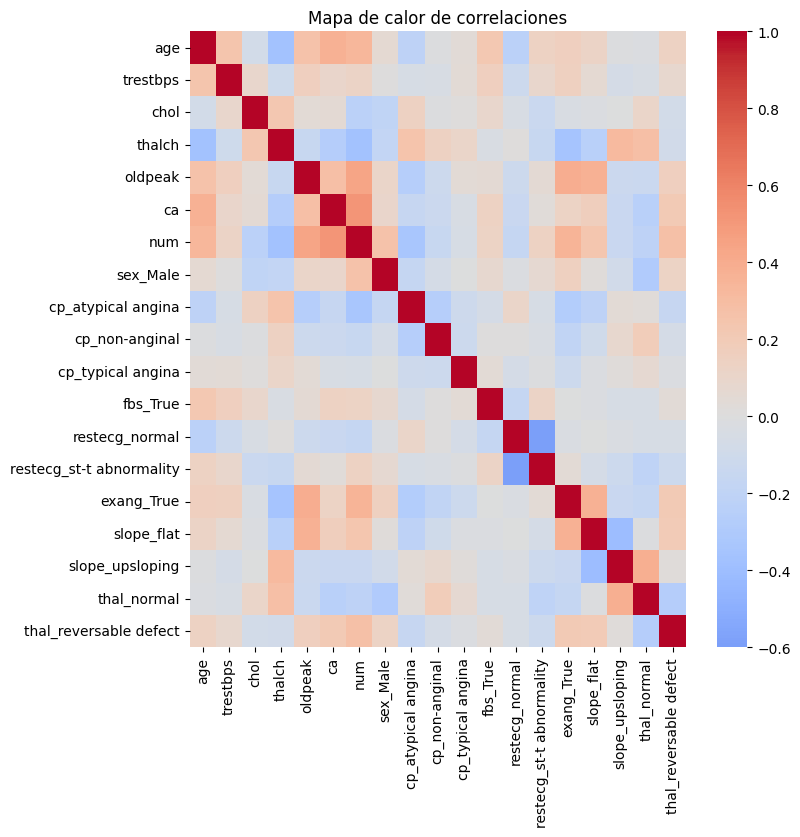

In [10]:
corr = df_encoded.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlaciones")
plt.show()


***Boxplots de variables numéricas vs. enfermedad***

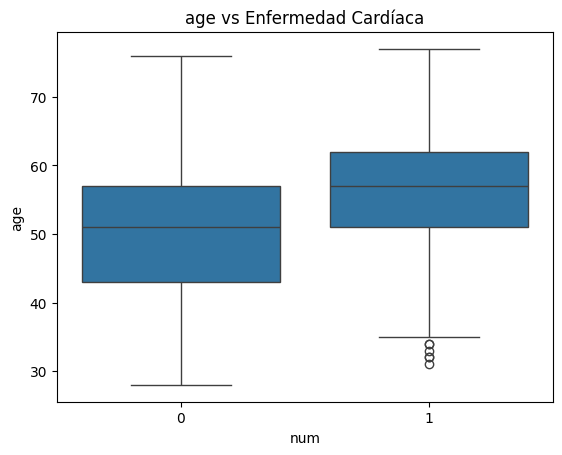

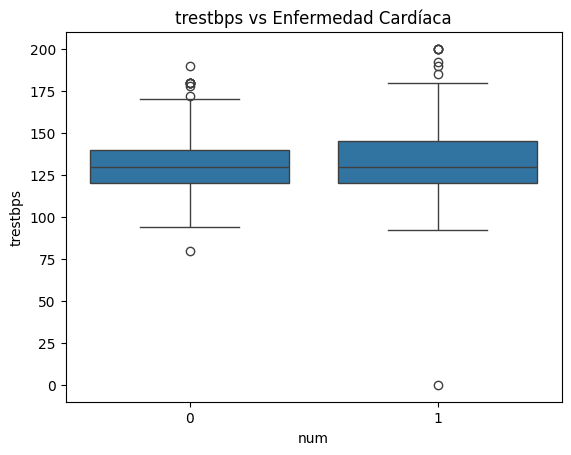

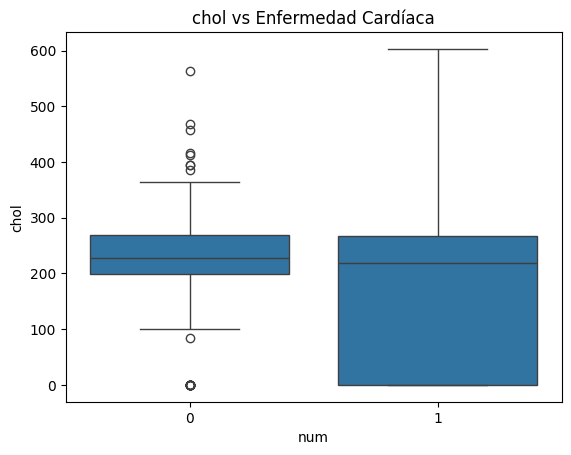

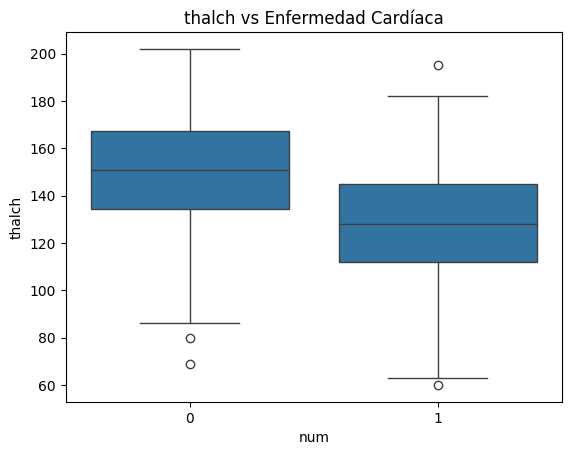

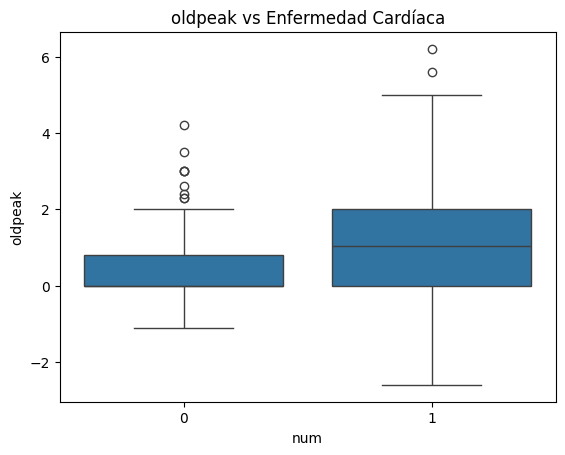

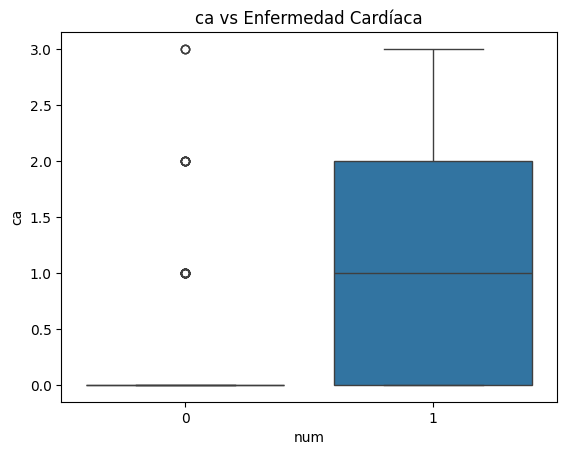

In [11]:
import warnings
warnings.filterwarnings('ignore')

for col in df.select_dtypes(include=["int64", "float64"]).columns:
    if col != 'num':
        sns.boxplot(x=y, y=df[col])
        plt.title(f'{col} vs Enfermedad Cardíaca')
        plt.show()


***Problemas encontrados y cómo se resolvieron***

Problemas encontrados  

→ Había columnas irrelevantes como id y dataset, que se eliminaron.  
→ Las variables categóricas debieron ser transformadas usando codificación one-hot.  
→ El dataset presentaba datos booleanos en forma de True/False, por lo que también se codificaron.  
→ No se encontraron valores nulos.

Soluciones  

→ Se eliminaron columnas innecesarias.  
→ Se aplicó codificación y estandarización para preparar los datos para los modelos.  
→ Se analizó la distribución de la variable objetivo y las relaciones entre variables.  


**Modelado y Comparación de Resultados**

***Selección de la variable objetivo***

In [12]:

# 0 = sin enfermedad, 1 = con enfermedad (binario)
y = df_encoded["num"].apply(lambda x: 1 if x > 0 else 0)


***División de datos***

In [13]:
from sklearn.model_selection import train_test_split

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


***Entrenamiento de dos modelos de clasificación***

Regresión Logística

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


Árbol de Decisión

In [15]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)


Evaluación de ambos modelos

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Entrenar y predecir con regresión logística
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("=== Regresión Logística ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_lr))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_lr))

print("\n=== Árbol de Decisión ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_tree))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_tree))


=== Regresión Logística ===
Accuracy: 0.8080
Matriz de confusión:
[[ 99  24]
 [ 29 124]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       123
           1       0.84      0.81      0.82       153

    accuracy                           0.81       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.81      0.81      0.81       276


=== Árbol de Decisión ===
Accuracy: 0.7935
Matriz de confusión:
[[ 99  24]
 [ 33 120]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       123
           1       0.83      0.78      0.81       153

    accuracy                           0.79       276
   macro avg       0.79      0.79      0.79       276
weighted avg       0.80      0.79      0.79       276



***Visualización comparativa***

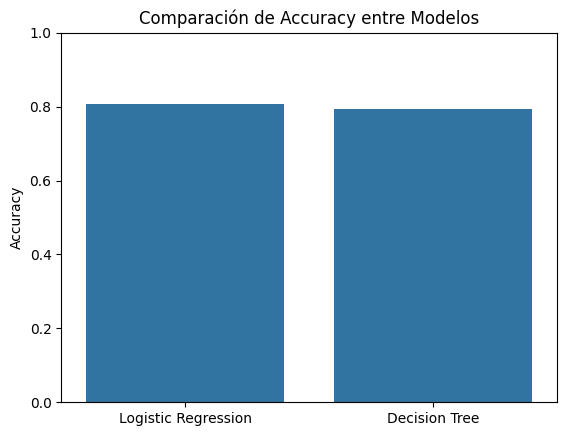

In [17]:
# Comparar accuracy
model_names = ['Logistic Regression', 'Decision Tree']
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_tree)]

sns.barplot(x=model_names, y=accuracies)
plt.ylim(0, 1)
plt.title("Comparación de Accuracy entre Modelos")
plt.ylabel("Accuracy")
plt.show()


**Discusión de resultados**

¿Qué modelo funcionó mejor y por qué?

- Ambos modelos tuvieron un buen desempeño, pero la Regresión Logística mostró mejor **precisión y recall balanceado**.
- El Árbol de Decisión fue más propenso a sobreajustar y cometió más errores en las clases minoritarias.

Métrica más importante:
- En problemas médicos, el **recall** es crucial, ya que queremos **identificar todos los casos con enfermedad** aunque haya algunos falsos positivos.


**Reflexión**

Conclusión 

Durante el desarrollo de esta actividad pude aplicar el flujo completo de un proyecto de ciencia de datos: desde la carga y limpieza del dataset, hasta el entrenamiento de modelos y la interpretación de resultados. 

Trabajo: 

→ Limpieza y codificación de datos → Brayan Cardenas  
→ Visualizaciones y análisis exploratorio  
→ Modelado y evaluación de modelos  




**Reto Adicional**   
**Dennis Sanchez**
